Data Shape: (303, 55)
First few rows:
    Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0   53      90     175   Male  29.387755   0    1               1          0   
1   67      70     157  Fmale  28.398718   0    1               0          0   
2   54      54     164   Male  20.077335   0    0               1          0   
3   66      67     158  Fmale  26.838648   0    1               0          0   
4   50      87     153  Fmale  37.165193   0    1               0          0   

   FH  ...    K   Na    WBC Lymph Neut  PLT EF-TTE  Region RWMA     VHD  \
0   0  ...  4.7  141   5700    39   52  261     50            0       N   
1   0  ...  4.7  156   7700    38   55  165     40            4       N   
2   0  ...  4.7  139   7400    38   60  230     40            2    mild   
3   0  ...  4.4  142  13000    18   72  742     55            0  Severe   
4   0  ...  4.0  140   9200    55   39  274     50            0  Severe   

     Cath  
0     Cad  
1    

C:\Users\milan\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\milan\AppData\Local\Temp\ipykernel_4924\3840870226.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\milan\AppData\Local\Temp\ipykernel_4924\3840870226.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\milan\AppData\Local\Temp\ipykernel_4924\3840870226.py:112: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\milan\AppData\Local\Temp\ipykernel_4924\3840870226.py:112: FutureWarning: The frame.append method is deprecated a

                 Model Accuracy   ROC AUC  Precision    Recall  F1-Score
0  Logistic Regression      NaN  0.939276   0.785714  0.611111  0.687500
4              XGBoost      NaN  0.931525   0.866667  0.722222  0.787879
3             CATBoost      NaN  0.901809   0.818182  0.500000  0.620690
2        Random Forest      NaN  0.896641   0.833333  0.555556  0.666667
1             LightBGM      NaN  0.849483   0.714286  0.555556  0.625000


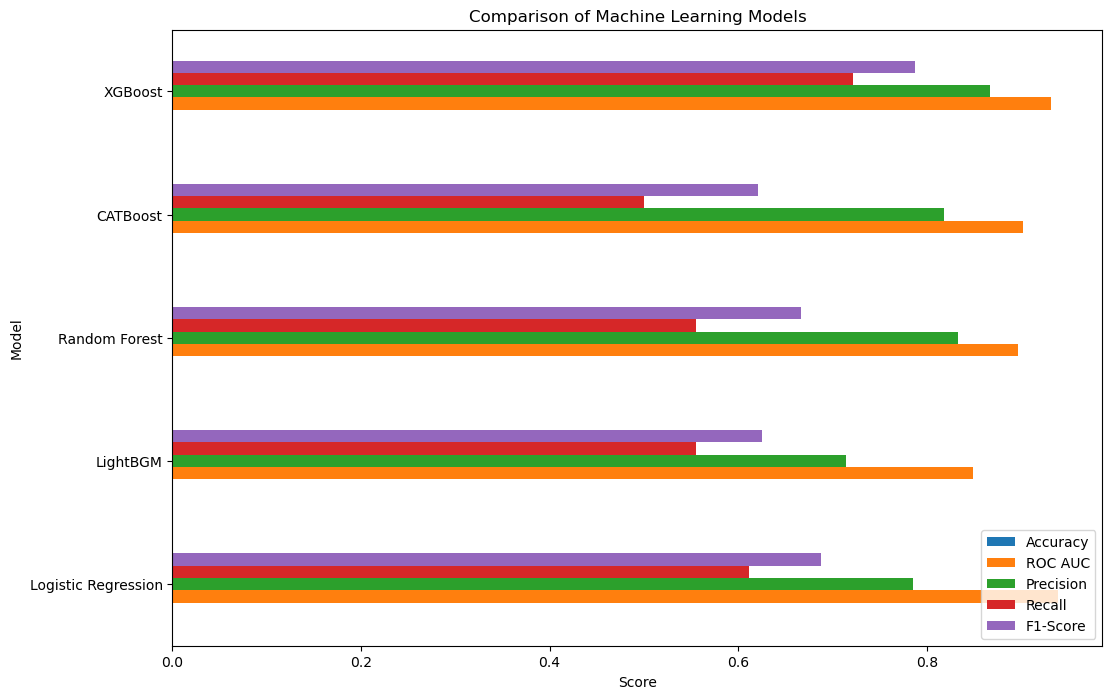

Confusion Matrix for Logistic Regression:

        Cad  Normal
Cad      40       3
Normal    7      11

--------------------------------------------------

Confusion Matrix for LightBGM:

        Cad  Normal
Cad      39       4
Normal    8      10

--------------------------------------------------

Confusion Matrix for Random Forest:

        Cad  Normal
Cad      41       2
Normal    8      10

--------------------------------------------------

Confusion Matrix for CATBoost:

        Cad  Normal
Cad      41       2
Normal    9       9

--------------------------------------------------

Confusion Matrix for XGBoost:

        Cad  Normal
Cad      41       2
Normal    5      13

--------------------------------------------------



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Load the dataset
data = pd.read_csv('C:/dataset/CAD.csv')

data.describe()

# Explore the dataset
print("Data Shape:", data.shape)
print("First few rows:\n", data.head())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values or drop them if appropriate (example: dropping rows with missing values)
data.dropna(inplace=True)

# Separate features and target
X = data.drop('Cath', axis=1)
y = data['Cath']

# Encode target labels as numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a preprocessing pipeline for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('LightBGM', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('CATBoost', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Initialize a DataFrame to store the evaluation metrics
results = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-Score'])

# Dictionary to store confusion matrices
confusion_matrices = {}

# Evaluate each model
for name, model in models:
    try:
        # Create a pipeline for each model
        clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions on the test data
        y_pred = clf.predict(X_test)
        y_pred_proba = clf.predict_proba(X_test)[:, 1] if len(np.unique(y_pred)) > 1 else np.zeros_like(y_pred, dtype=float)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if len(np.unique(y_pred)) > 1 else np.nan
        
        # Handle cases where precision, recall, or f1 might fail
        try:
            precision = precision_score(y_test, y_pred)
        except ValueError:
            precision = np.nan
        
        try:
            recall = recall_score(y_test, y_pred)
        except ValueError:
            recall = np.nan
        
        try:
            f1 = f1_score(y_test, y_pred)
        except ValueError:
            f1 = np.nan
        
        # Compute and store confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        confusion_matrices[name] = conf_matrix
        
        # Append the results to the DataFrame
        results = results.append({
            'Model': name,
            'ROC AUC': roc_auc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }, ignore_index=True)
    
    except Exception as e:
        print(f"Error with model {name}: {e}")

# Display the results
print(results.sort_values(by='ROC AUC', ascending=False))

# Plotting the results for comparison
results.set_index('Model', inplace=True)
results.plot(kind='barh', figsize=(12, 8))
plt.title("Comparison of Machine Learning Models")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices in table format
for name, conf_matrix in confusion_matrices.items():
    print(f"Confusion Matrix for {name}:\n")
    
    # Create a DataFrame for the confusion matrix
    conf_matrix_df = pd.DataFrame(
        conf_matrix,
        index=label_encoder.classes_,  # True labels
        columns=label_encoder.classes_  # Predicted labels
    )
    
    # Print the DataFrame
    print(conf_matrix_df)
    print("\n" + "-"*50 + "\n")


In [2]:
# Display the results
print(results.sort_values(by='ROC AUC', ascending=False))

# Plotting the results for comparison
results.set_index('Model', inplace=True)
results.plot(kind='barh', figsize=(12, 8))
plt.title("Comparison of Machine Learning Models")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices
for name, conf_matrix in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


                    Accuracy   ROC AUC  Precision    Recall  F1-Score
Model                                                                
Logistic Regression      NaN  0.939276   0.785714  0.611111  0.687500
XGBoost                  NaN  0.931525   0.866667  0.722222  0.787879
CATBoost                 NaN  0.901809   0.818182  0.500000  0.620690
Random Forest            NaN  0.896641   0.833333  0.555556  0.666667
LightBGM                 NaN  0.849483   0.714286  0.555556  0.625000


KeyError: "None of ['Model'] are in the columns"